In [40]:
#Importing Libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importing Library for Splitting
from sklearn.model_selection import train_test_split

#Importing Model Libraries for Training and Testing Data
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing Model Libraries to Check our Accuracy Score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

#Importing Model for Coverting String to Integer
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

#Importing Model Library to Check and Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Importing The Data
CarPrice=pd.read_csv("C:/Users/HELLO/Documents/DOCUMENTS/Excel/car_price_prediction.csv")
CarPrice

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [42]:
CarPrice.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

#### EXPLORE DATA AND DATE CLEANING

In [43]:
#Checking the DataType of each Column of the Data
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [44]:
#Checking the number of Empty cells in each Column
CarPrice.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [45]:
#Checking the Aggregation of the Dataset
CarPrice.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [46]:
#Getting the Total sum of Duplicates
CarPrice.duplicated().sum()

313

In [47]:
#Removing Duplicates #Re-checking Duplicates
CarPrice.drop_duplicates(inplace=True)
CarPrice.duplicated().sum()

0

#### ANALYSIS AND PREPOCESSING DATA

In [48]:
#Showing the unique numbers of items in each Columns
for col in CarPrice.columns :
    print(f'Category {col} is : {CarPrice[col].nunique()} ')

Category ID is : 18924 
Category Price is : 2315 
Category Levy is : 559 
Category Manufacturer is : 65 
Category Model is : 1590 
Category Prod. year is : 54 
Category Category is : 11 
Category Leather interior is : 2 
Category Fuel type is : 7 
Category Engine volume is : 107 
Category Mileage is : 7687 
Category Cylinders is : 13 
Category Gear box type is : 4 
Category Drive wheels is : 3 
Category Doors is : 3 
Category Wheel is : 2 
Category Color is : 16 
Category Airbags is : 17 


In [49]:
#Dropping Column 
CarPrice=CarPrice.drop(['ID','Doors'],axis=1)

In [50]:
#Checking the Levy Column info
CarPrice["Levy"].info()

<class 'pandas.core.series.Series'>
Int64Index: 18924 entries, 0 to 19236
Series name: Levy
Non-Null Count  Dtype 
--------------  ----- 
18924 non-null  object
dtypes: object(1)
memory usage: 295.7+ KB


In [51]:
#Replacing hyphen(-) with "0" in Levy Column
CarPrice['Levy']=CarPrice['Levy'].replace('-','0')

In [52]:
#Converting the Levy Column to Integer type
CarPrice["Levy"]=CarPrice["Levy"].astype("int")

In [53]:
#Re-Checking the Levy Column info
CarPrice["Levy"].info()

<class 'pandas.core.series.Series'>
Int64Index: 18924 entries, 0 to 19236
Series name: Levy
Non-Null Count  Dtype
--------------  -----
18924 non-null  int32
dtypes: int32(1)
memory usage: 221.8 KB


In [54]:
#Replacing the Turbo(object) to Empty space in Engine Volume Column
CarPrice["Engine volume"]=CarPrice["Engine volume"].str.replace("Turbo","")

In [55]:
#Converting the Engine Volume Column to Float type
CarPrice['Engine volume']=CarPrice['Engine volume'].astype('float64')

In [56]:
#Checking the Engine Volume Column info
CarPrice["Engine volume"].info()

<class 'pandas.core.series.Series'>
Int64Index: 18924 entries, 0 to 19236
Series name: Engine volume
Non-Null Count  Dtype  
--------------  -----  
18924 non-null  float64
dtypes: float64(1)
memory usage: 295.7 KB


In [57]:
#Removing the km in the Mileage Column 
CarPrice['Mileage']=CarPrice['Mileage'].str.replace('km','')

In [58]:
#Converting the Mileage Column to Integer Type
CarPrice["Mileage"]=CarPrice["Mileage"].astype("int")

In [59]:
#Assigning Datetime with Dtime
dtime = dt.datetime.now()

In [60]:
#To get the age column, subtracting the variable assigned to date.now with the prod.year
CarPrice['Age']=dtime.year-CarPrice['Prod. year']

In [61]:
#Checking the Age Column
CarPrice["Age"]

0        14
1        13
2        18
3        13
4        10
         ..
19232    25
19233    13
19234    14
19235    17
19236    12
Name: Age, Length: 18924, dtype: int64

In [62]:
#Dropping Production Year Column
CarPrice=CarPrice.drop('Prod. year',axis=1)

In [63]:
#Cross-Checking the Dataset informations
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  int32  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int32(2), int64(3), objec

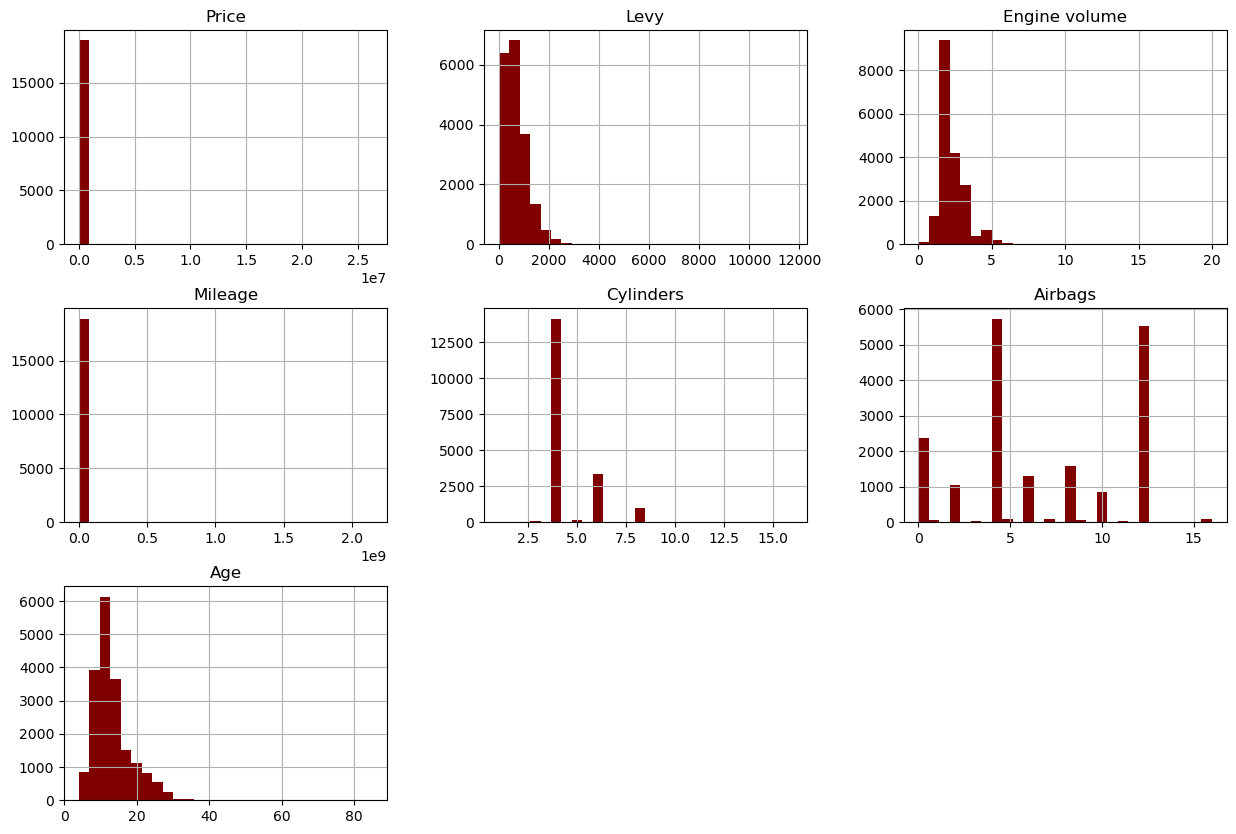

In [64]:
#Plotting the Integer Columns on Histogram
CarPrice.hist(bins = 28, figsize=(15, 10), color ='maroon')
plt.show()

##### EXPLAINING THE PLOTS ABOVE
in Levy column: Most values between more than 0 and less than 2000

2- Most Engine valume in range (1 to 5)

3- Mileage for most cars are 0.0 (most cars are new)

4- in Airbags column: Most cars have 3 to 5 airbags or 13 airbags

5- in Age column: Most cars are 13 years old, but we have some very old cars

6- All Price are from 0


In [65]:
#Getting the Top10 of the Manufacturer Column
top10cars=CarPrice.Manufacturer.value_counts()[:10]
top10cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

In [66]:
#The Mean Price of the Top10 Manufacturers 
top10meancars=[CarPrice[CarPrice['Manufacturer' ]== i]['Price'].mean() for i in list(top10cars.index)]
top10meancars

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

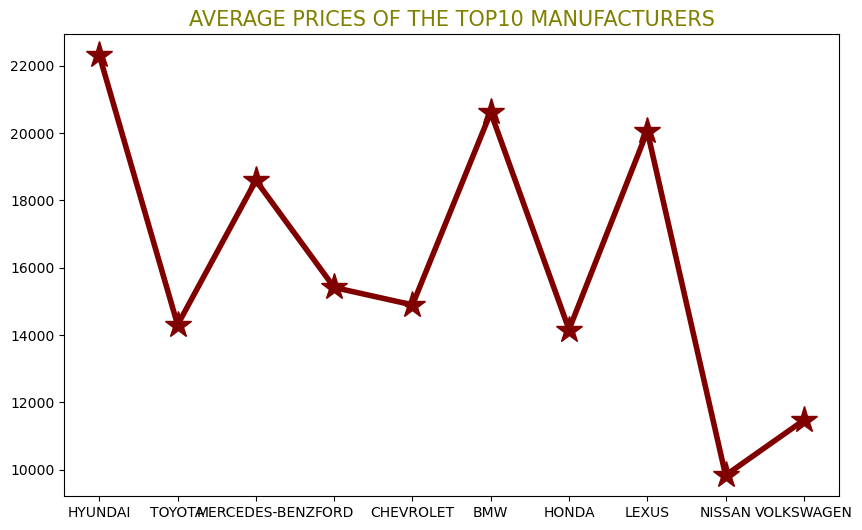

In [67]:
#Plotting the Average Price for the Top10 Manufacturers
plt.figure(figsize=(10,6))
plt.plot(top10cars.index,top10meancars ,color='maroon',linewidth=4,marker='*',markersize=20)
plt.title('AVERAGE PRICES OF THE TOP10 MANUFACTURERS',c="olive",fontsize=15)
plt.show()

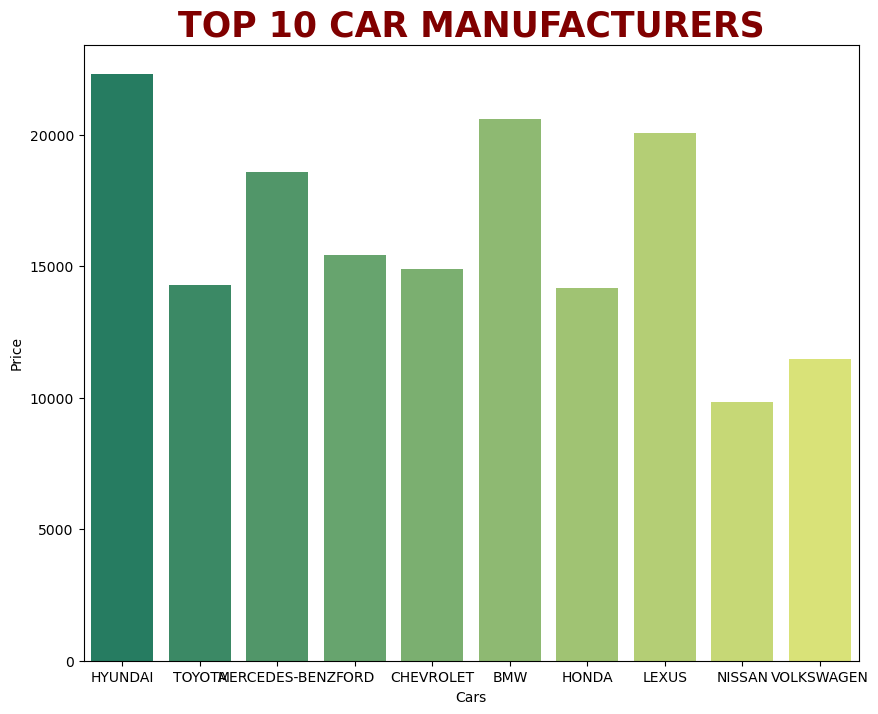

In [68]:
#Plotting the Graph for Top10 Cars Manufacturer using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=top10cars.index,y=top10meancars,palette="summer",linewidth=3)
plt.title("TOP 10 CAR MANUFACTURERS",loc="center",fontweight="bold",c="maroon",fontsize=25)
plt.xlabel("Cars",fontsize=10)
plt.ylabel("Price",fontsize=10)
plt.tight_layout
plt.show()

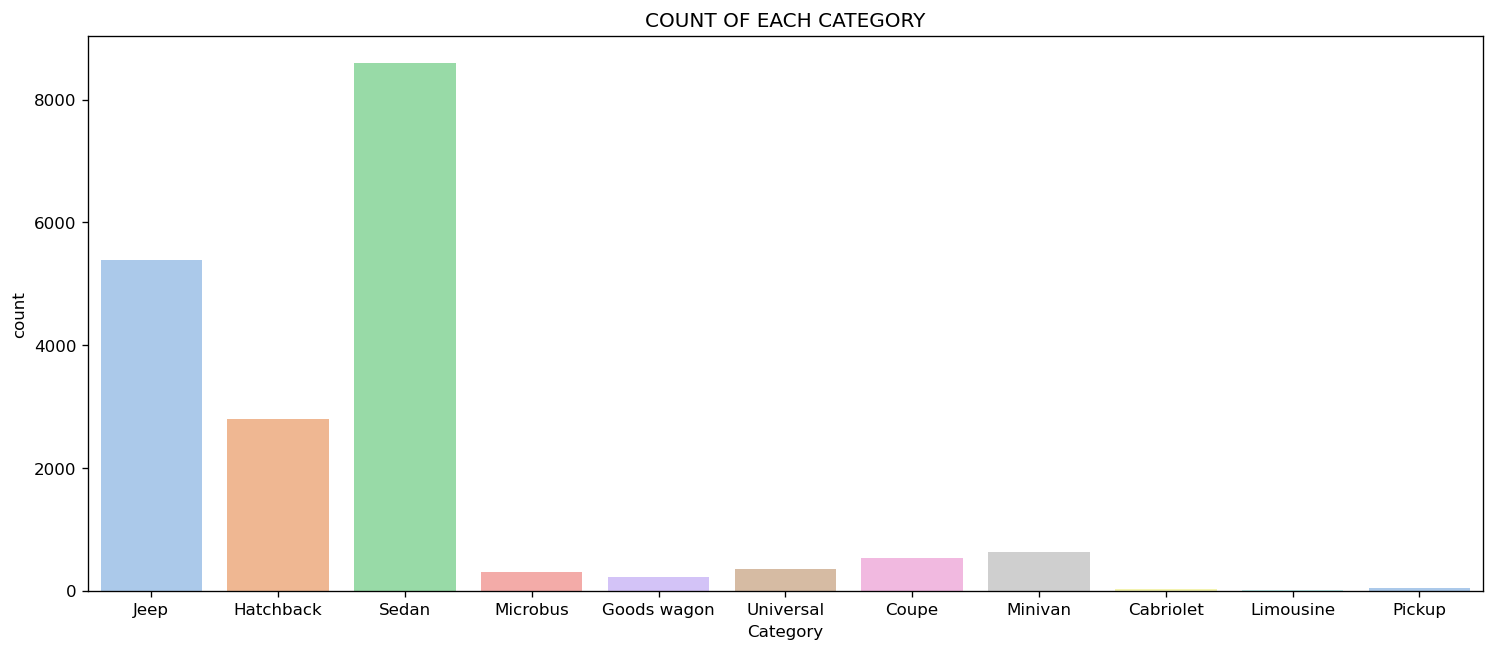

In [69]:
#Plotting the Chart of Count of Each Category
plt.subplots(figsize=(15,6),dpi=120)
sns.countplot(data=CarPrice,x='Category',palette='pastel')
plt.title("COUNT OF EACH CATEGORY")
plt.show()

### Most types of Category are Jeep, Hatchback and Sedan

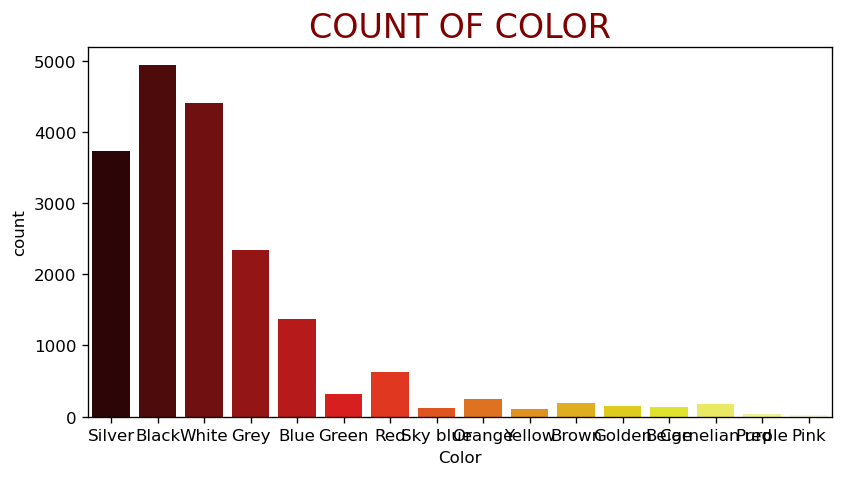

In [70]:
#Plotting the chart for Count of color
plt.subplots(figsize=(8,4),dpi=120)
sns.countplot(data=CarPrice,x="Color",palette="hot")
plt.title("COUNT OF COLOR",fontsize=20,c="maroon")
plt.show()

#### The most car color are Silver, Black, White and Grey

In [71]:
#Assigning the Object DataType column in the Dataset into a Variable
Obj_Columns=CarPrice.select_dtypes(include='object')

In [72]:
#Displaying the Object DataType Column in the Dataset 
Obj_Columns.columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

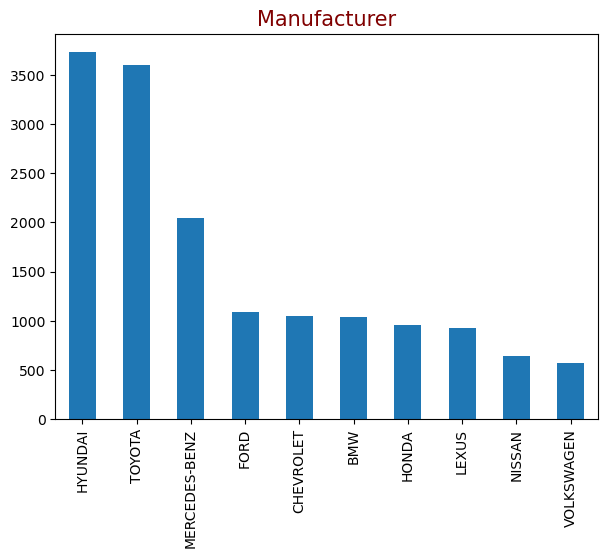

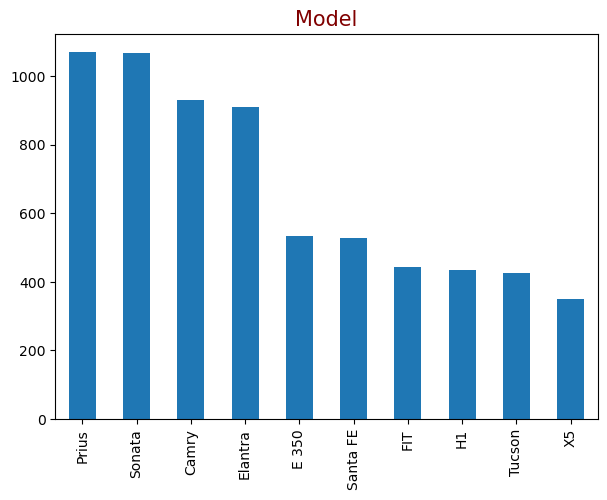

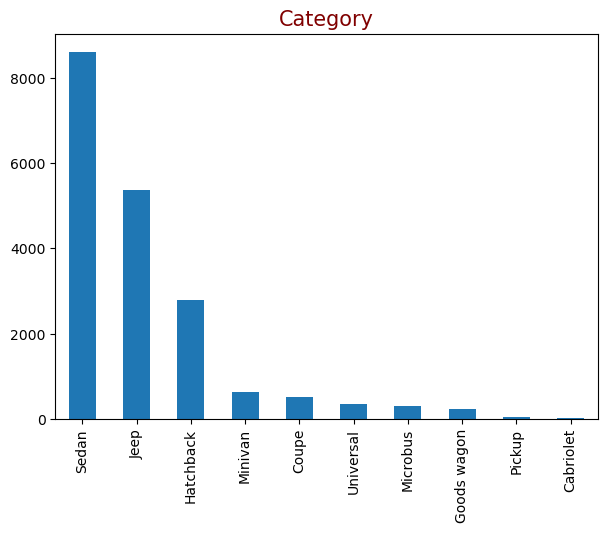

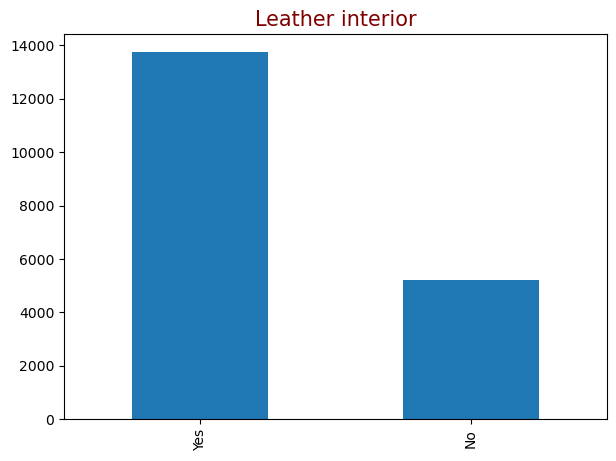

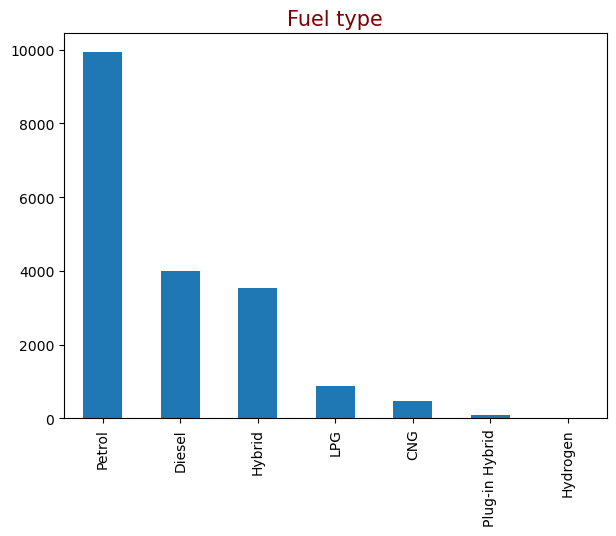

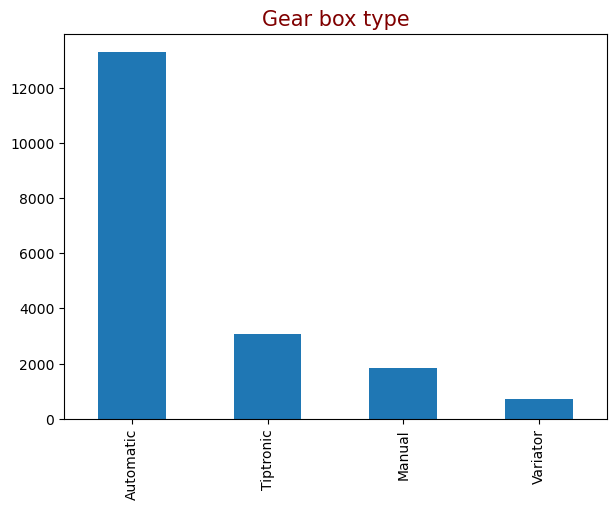

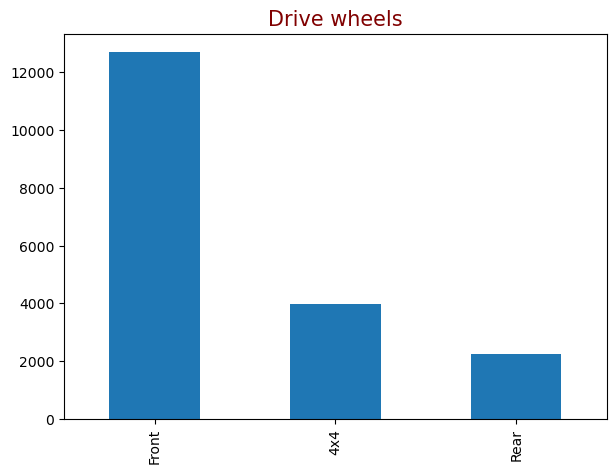

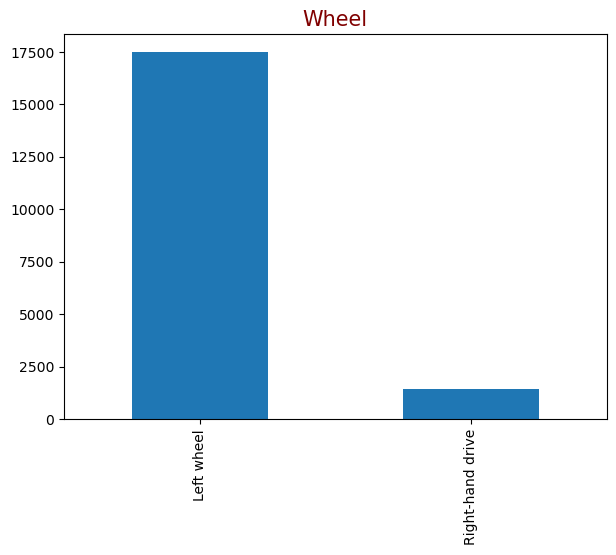

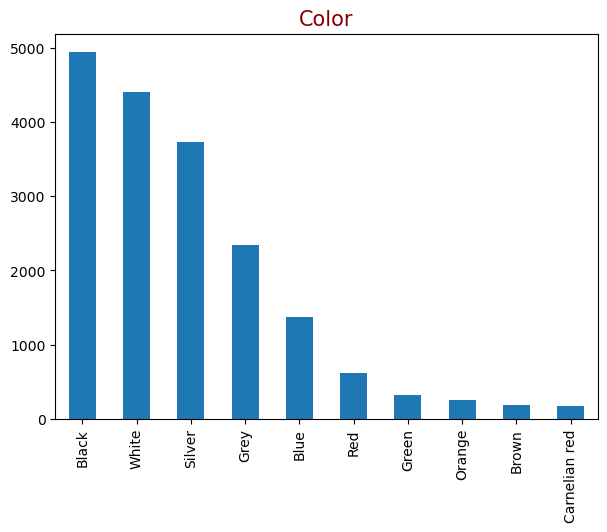

In [73]:
#Plotting Chart for the Object DataType Column   
for items in Obj_Columns:
    plt.figure(figsize=(7,5))
    top10=CarPrice[items].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title(items,fontsize=15,c="maroon")
    plt.show()

In [74]:
#Getting the correlation of the Dataset excluding the object Columns
Data_Corr=CarPrice.select_dtypes(exclude=object).corr()
Data_Corr

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.008888,-0.001763,0.007435,-0.012709,-0.012689
Levy,-0.003558,1.000000,0.378117,-0.021203,0.251632,0.125015,-0.362827
Engine volume,0.008888,0.378117,1.000000,-0.006292,0.777228,0.221991,0.032427
Mileage,-0.001763,-0.021203,-0.006292,1.000000,-0.001720,-0.009174,0.064058
Cylinders,0.007435,0.251632,0.777228,-0.001720,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.221991,-0.009174,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,0.032427,0.064058,0.099443,-0.235160,1.000000


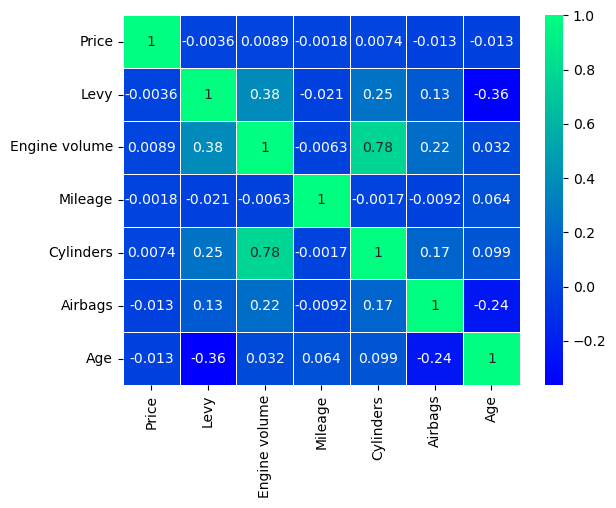

In [75]:
#Plotting The Correlation Column with Heatmap
sns.heatmap(Data_Corr,annot=True,linewidths=0.5,cmap="winter")
plt.show()

#### FINAL RESULT

DataSet = Car Price

Dataset Shape = (Rows = 205, columns = 26)

No Empty Value

No Duplicated Value 

-Price cars Avg price = $13,276

-Min price = $5,118 

-Max price = $45,400

The famous or repeats car > Toyota Most using car working in Gas around 90% and the average price less than the car working in Diesel. some category using the car working in Diesel around 10%, but the average price is more than the car working on Gas.

Most cars stand around 82%, also the average price less for Turbo, with turbo cars comprising around 18%.

Approximately 56% of users drive cars with 4 doors, while 46% drive cars with 2 doors; sports cars maintain a similar average price.

Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices. Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.

The most common engine type is "ohc," correlating with lower prices.

When increasing the number of cylinders, the price tends to increase, though the majority of users stick with 4 cylinders. As the engine size increases, so does the price. The wheelbase, car length, and car width have an effect on the price, but the car height doesn't seem to have any significant impact.

#### OUTLIER DATA

In [76]:
#Assigning a Variable for Columns with numeric values excluding the object DataTypes
IntData=CarPrice.select_dtypes(exclude=object)
IntData

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
0,13328,1399,3.5,186005,6.0,12,14
1,16621,1018,3.0,192000,6.0,8,13
2,8467,0,1.3,200000,4.0,2,18
3,3607,862,2.5,168966,4.0,0,13
4,11726,446,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...
19232,8467,0,2.0,300000,4.0,5,25
19233,15681,831,2.4,161600,4.0,8,13
19234,26108,836,2.0,116365,4.0,4,14
19235,5331,1288,2.0,51258,4.0,4,17


In [77]:
#Calculating the Outliers using some criterias
for col in IntData:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1=IntData[col].quantile(0.25)
    Q3=IntData[col].quantile(0.75)
    
    # Calculate Interquartile Range (IQR)
    IQR=Q3-Q1
    
    # Define lower and upper bounds for outliers
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    # Identify outliers
    outliers=((IntData[col]<lower_bound)|(IntData[col]>upper_bound)).sum()
    
    # Calculate total number of data points
    total_points=IntData[col].shape[0]
    
    # Print the number and percentage of outliers
    
    print(f"Total Outliers in {col}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

Total Outliers in Price: 1055 -- 5.57%
Total Outliers in Levy: 160 -- 0.85%
Total Outliers in Engine volume: 1358 -- 7.18%
Total Outliers in Mileage: 635 -- 3.36%
Total Outliers in Cylinders: 4765 -- 25.18%
Total Outliers in Airbags: 0 -- 0.0%
Total Outliers in Age: 962 -- 5.08%


In [78]:
if outliers>0:
    CarPrice=CarPrice.loc[(CarPrice[col]<=upper_bound)&(CarPrice[col]>=lower_bound)]

#### DATA TRANSFORMATION

In [79]:
#Grouping DataTypes with Variables
ObjData=CarPrice.select_dtypes(include=object)
UnObjData=CarPrice.select_dtypes(exclude=object)

In [80]:
#Fitting Data with LabelEncoder
for i in range(0,ObjData.shape[1]):
    ObjData.iloc[:,i] = LE.fit_transform(ObjData.iloc[:,i]) 

In [81]:
#Joining Object Data and Unique Object Data.
CarPrice= pd.concat([ObjData,UnObjData],axis=1)

In [82]:
CarPrice

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1136,4,1,2,0,0,0,12,13328,1399,3.5,186005,6.0,12,14
1,8,586,4,0,5,2,0,0,1,16621,1018,3.0,192000,6.0,8,13
2,21,610,3,0,5,3,1,1,1,8467,0,1.3,200000,4.0,2,18
3,16,589,4,1,2,0,0,0,14,3607,862,2.5,168966,4.0,0,13
4,21,610,3,1,5,0,1,0,12,11726,446,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,36,530,9,1,1,0,2,0,7,5802,1055,3.5,107800,6.0,12,11
19233,23,1213,9,1,5,2,1,0,11,15681,831,2.4,161600,4.0,8,13
19234,23,1312,4,1,1,0,1,0,7,26108,836,2.0,116365,4.0,4,14
19235,8,396,4,1,1,0,1,0,1,5331,1288,2.0,51258,4.0,4,17


#### CREATING MODELS

In [83]:
#Splitting the Dataset into Features and Target
X=CarPrice.drop('Price',axis=1)
Y=CarPrice['Price']

In [84]:
#Using train_test_split for Data splitting
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [85]:
#Models for Testing and Checking Accuracy Score
Models=['LinearRegression','DecisionTreeClassifier','RandomForestRegressor','GradientBoostingRegressor','SVR']
R2=[]
RMSE=[]

In [86]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()
model5=SVR()

In [87]:
#Putting our Models into function for fitting and checking.
def models(Model):
    Model.fit(x_train,y_train)
    Pre=Model.predict(x_test)
    Acc=r2_score(y_test,Pre)
    Rmse=np.sqrt(mean_squared_error(y_test,Pre))
    R2.append(Acc)
    RMSE.append(Rmse)
    score = Model.score(x_test,y_test)
    print(f'The Model score is :{score}')

In [88]:
#Displaying the Model Scores
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

The Model score is :0.19763865818822657
The Model score is :0.4275594318478304
The Model score is :0.6763747448455649
The Model score is :0.5025397325478342
The Model score is :-0.0388147939980199


In [89]:
#Passing our Models into a DataFrame
CarPrice=pd.DataFrame({'Algorithm':Models, 'R2_score': R2, 'RMSE':RMSE})
CarPrice

,Algorithm,R2_score,RMSE
0,LinearRegression,0.197639,17766.434324
1,DecisionTreeClassifier,0.427559,15006.536845
2,RandomForestRegressor,0.676375,11283.308949
3,GradientBoostingRegressor,0.502540,13989.251446
4,SVR,-0.038815,20215.493127


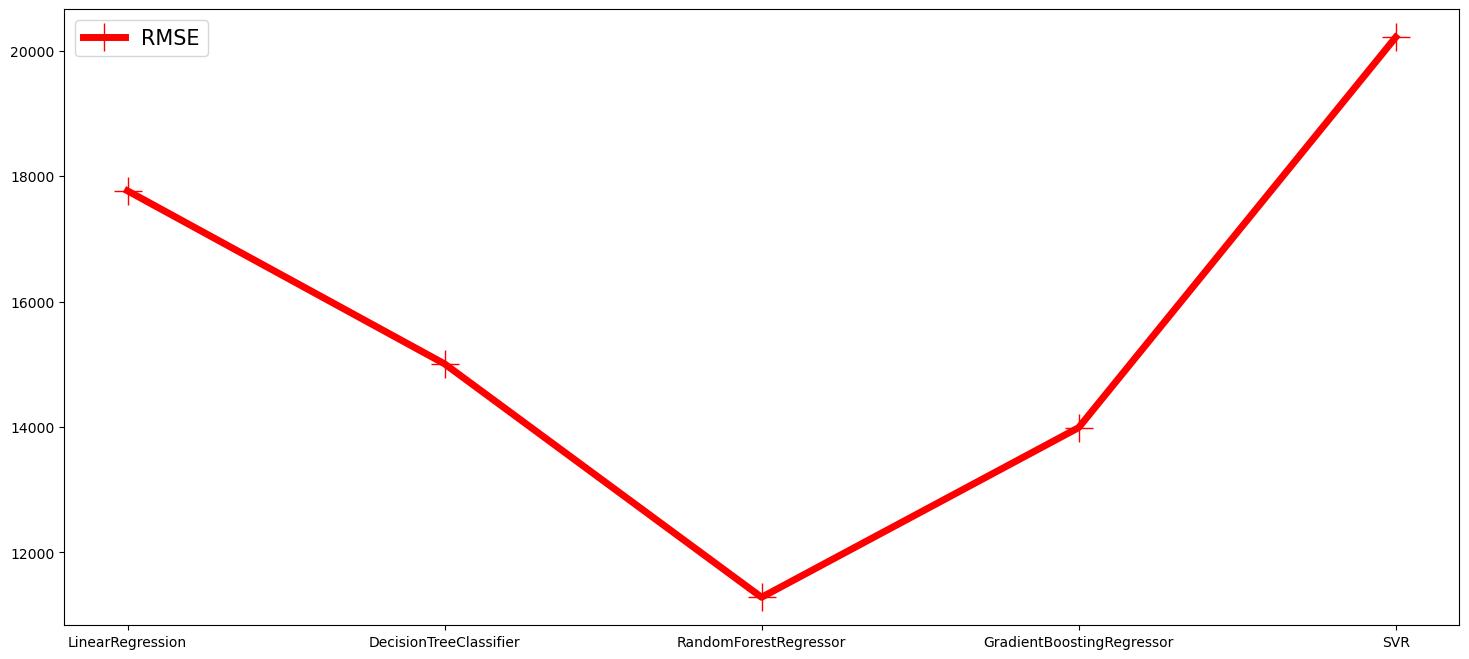

In [90]:
#Plotting the RMSE Score using line chart
Fig=plt.figure(figsize=(18,8))
plt.plot(CarPrice.Algorithm,CarPrice.RMSE ,label='RMSE',lw=5,color='r',marker='+',markersize=20)
plt.legend(fontsize=15)
plt.show()

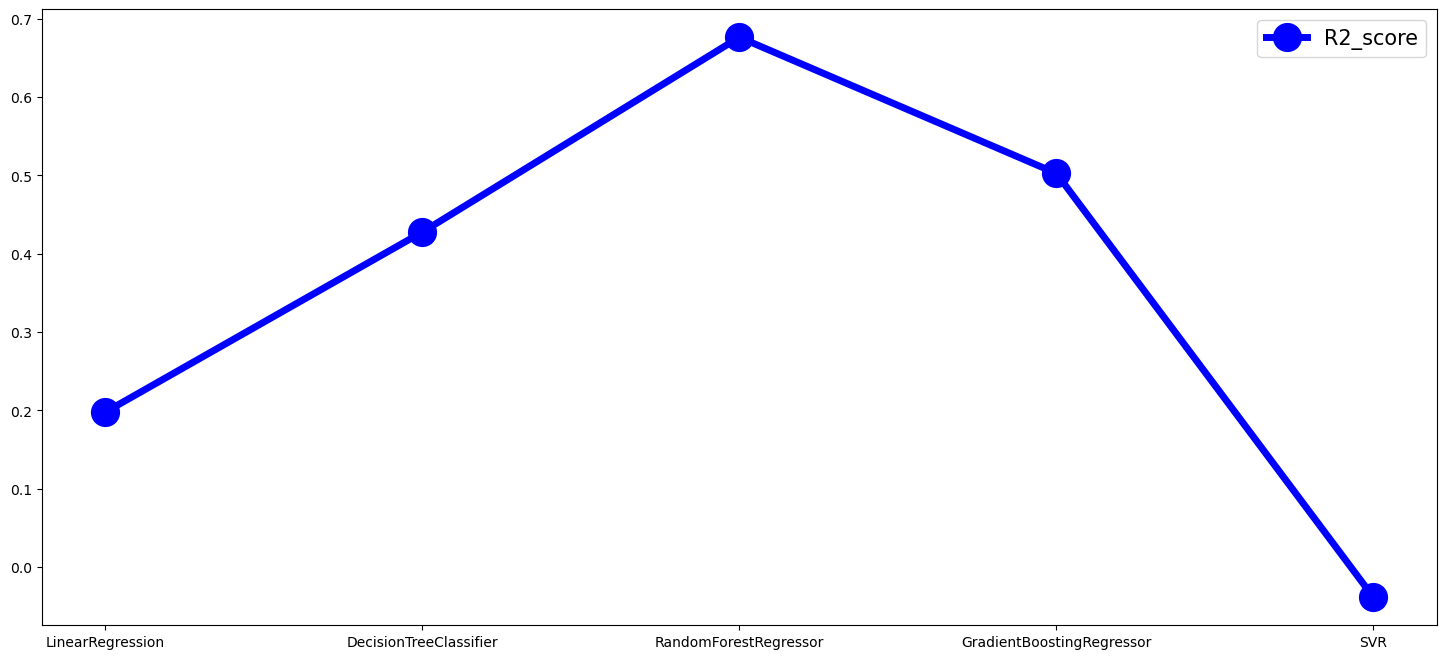

In [92]:
#Plotting the R2_score using line chart
Fig2=plt.figure(figsize=(18,8))
plt.plot(CarPrice.Algorithm,CarPrice.R2_score ,label='R2_score',lw=5,color='b',marker='o',markersize=20)
plt.legend(fontsize=15)
plt.show()

#### DIFFERENCES BTEWEEN ACTUAL VALUE AND PREDICTED RESULT

In [117]:
#Assigning a variable to the Machine Test Result
Pre=model3.predict(x_test)

In [118]:
#SHOWING THE DIFFERENCES BETWEEN OUR ACTUAL VALUE AND PREDICTED VALUE
pred_CarPrice=pd.DataFrame({'Actual Value':y_test,'Predicted Value':Pre,'Difference':y_test-Pre})
pred_CarPrice.head()

,Actual Value,Predicted Value,Difference
16872,13799,13569.94,229.06
13252,40769,20258.82,20510.18
2659,37320,27032.83,10287.17
9012,25089,22034.28,3054.72
18627,72130,59251.21,12878.79
